# Numerical Solutions to the Thermodynamics of an Ideal Fermi Gas:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/hariseldon99/StatMechCodes/master?filepath=Fermigas_ChemPot.ipynb)
## Introduction
This jupyter notebook numerically evaluates the integral for the density of particles in an ideal Fermi gas in order to determine the value of the chemical potential $\mu$ of an ideal Fermi gas. The python code and resultant plots can be found in the cell below. You may alter the temperature range plotted by altering the variable 'temps' in the code. Also, if you wish for the dimensionless chemical potential $\mu^\ast$ for a particular dimensionless temperature $T^\ast$ (See description for details), you must first estimate a value $\mu^\ast_0$ and call the python function 'ChemPot' with the arguments $T^\ast, \mu^\ast_0$. For instance, 

    print(ChemPot(0.5, 0.9))

yields a value $\mu^\ast = 0.74311$ at temperature $T^\ast = 0.5$. This means that the chemical potential $\mu = 0.74311\; \epsilon_F$ at temperature $T = 0.5\; T_F$, where $\epsilon_F\; (T_F)$ is the Fermi energy (temperature).

In order to run the code in this notebook, you may download it and run it in a python distribution installed locally (see "Exercises" below on details on how to do this), or simply run it online on [Binder](https://mybinder.org) by clicking on the "launch binder" badge shown above.

## Description
To find the chemical potential $\mu$ of an ideal Fermi gas in $d=3$ dimensions for temperature $T > 0$ , we need to find the value of $\mu$ that yields the desired number of particles. For an ideal Fermi gas in a volume $V$ with $N$ noninteracting fermions of mass $m$ each [1], we have
$$
N = \int^\infty_0 n(\epsilon) g(\epsilon) \mathrm{d}\epsilon = \frac{V(2m)^{3/2}}{2\pi^2\hbar^3}\int^\infty_0 {\epsilon^{1/2}}S[\beta(\mu-\epsilon)]\;\mathrm{d}\epsilon.
$$
Here, $g(\epsilon) = \left(V \mathbin{/} 2\pi^2\hbar^3\right)\times (2m)^{3/2}\epsilon^{1/2}$ is the is the density of states of fermions at energy $\epsilon$, and $n(\epsilon)= S[\beta(\mu-\epsilon)]$ is the number density at energy $\epsilon$, given by the Fermi-Dirac distribution expressed with the sigmoid function $S(x) = [1+\exp{(-x)}]^{-1}$. Our goal is to find the value of $\mu$ that gives the desired density $\rho = N/V$. Because the integral cannot be done analytically except at low temperatures, we will use numerical methods to evaluate it. The sigmoid function is evaluated numerically using via the 'scipy.special.expit' routine [2].

It is convenient to define dimensionless quantities $x = \epsilon/\epsilon_F$, $\mu^\ast=\mu/\epsilon_F$ and $T^\ast = k_BT/\epsilon_F$, where $\epsilon_F$ is the Fermi energy given by
$$
\epsilon_F = \frac{\hbar^2}{2m}\left(3\pi^2\rho\right)^{2/3}.
$$
Now, it is sufficient to simply get $\mu^\ast$ as a function of $T^\ast$. Clearly, at $T=0$, $\mu=\epsilon_F$ and so $\mu^\ast=1$ at $T^\ast=0$. We then rewrite the integrand above in terms of the dimensionless variables defined above. This yields
$$
1 = \frac{3}{2}\int^\infty_0 {x^{1/2}S\left[(x-\mu^\ast)\mathbin{/} T^\ast\right]\mathrm{d}x}.
$$
Here, we have an integral equation that needs to be solved for every $T^\ast$ to get the corresponding $\mu^\ast$. The only exact analytical solution exists  at $T^\ast=0$, where $T=0$ and $\mu=\epsilon_F$ and so $\mu^\ast=1$.

We first define a function (coded below as 'ChemPotFunc')
$$
f(\mu^\ast, T^\ast) = 1-\frac{3}{2}\int^\infty_0 {x^{1/2}S\left[(x-\mu^\ast)\mathbin{/} T^\ast\right]\mathrm{d}x},
$$
where, for any arbitrary independent variables $\mu^\ast, T^\ast$, the RHS is evaluated using the general purpose Gauss-Kronrod quadrature [5] algorithm accessible via the 'scipy.integrate.quad' routine [3]. Now, for a particular $T^\ast$, we define a function $\mu^\ast(T^\ast, \mu^\ast_0)$ (coded below as 'ChemPot') that takes as an argument a rough estimate of the root $f(\mu^\ast_0, T^\ast)\approx 0$ and polishes it using the Newton-Raphson method [6] to returns $\mu^\ast$ the near-exact root of 'f' for that particular $T^\ast$. The Newton-Raphson method evaluates an iterated map that is expected to converge to the root of 'f',
$$
\mu^\ast_{n+1} = \mu^\ast_n - \frac{f(\mu^\ast_n, T^\ast)}{f'(\mu^\ast_n, T^\ast)},
$$
where $f'(\mu^\ast_n, T^\ast) = \partial f/\partial\mu^\ast$ is evaluated by using Gauss-Kronrod quadrature [5] on the analytically obtained partial derivative,
$$
f'(\mu^\ast_n, T^\ast) = -\frac{3}{2}\frac{\partial}{\partial\mu^\ast} \int^\infty_0 {x^{1/2}S\left[(x-\mu^\ast)\mathbin{/} T^\ast\right]\mathrm{d}x} = -\frac{3}{2} \int^\infty_0 {x^{1/2}\;S\left[(x-\mu^\ast)\mathbin{/} T^\ast\right]\bigg\{1 - S\left[(x-\mu^\ast)\mathbin{/} T^\ast\right]\bigg\}\mathrm{d}x}
$$
Next, a reasonably large range of $T^\ast$ is chosen starting from $0$, and $\mu^\ast$ obtained $\forall T^\ast$ by 'ChemPot' using the exact $\mu^\ast$ from the previous value of $T^\ast$ as $\mu^\ast_0$. These values are plotted below the python code in the next cell. The plot is contrasted with the Sommerfeld expansion [1] of the chemical potential, valid at low temperatures, given by 
$$
\mu^\ast \approx 1 - \frac{\pi^2}{12}\left(T^\ast\right)^2.
$$
Note that the Sommerfeld expansion deviates noticeably from the exact solution from around half of the Fermi temperature $T_F = \epsilon_F/k_B$. Finally, we can also evaluate the average energy per particle of the Fermi gas [1] from
$$
E = V \frac{(2m)^{3/2}}{2\pi^2\hbar^3}\int^\infty_0 \frac{\epsilon^{3/2}\mathrm{d}\epsilon}{1 + e^{\beta\left(\epsilon-\mu\right)}}
$$
by simplifying this expression using the dimensionless quantity $\epsilon^\ast = E/(N \epsilon_F)$, yielding
$$
\epsilon^\ast = \frac{3}{2}\int^\infty_0 {x^{3/2}\;S\left[(x-\mu^\ast)\mathbin{/} T^\ast\right] \mathrm{d}x}
$$
which can also be evaluated numerically using the same Gauss-Kronrod method as before. The specific heat $C_N = \partial E\mathbin{/}\partial T = Nk_B\;\partial \epsilon^\ast\mathbin{/}\partial T^\ast$ can also be obtained by numerical differentiation of $\epsilon^\ast$ using the 'numpy.gradient' function [7]. These are plotted in the results below. Note the comparison of $C_N$ with the specific heat of the ideal classical gas, given by $C_N = (3\mathbin{/}2) Nk_B$. Finally, the Sommerfeld expansion (low-temperature) of the energy and specific heats can be readily calculated (details are left as exercise) and are given below.
$$
\epsilon^\ast \approx \frac{3}{5} + \frac{\pi^2}{4}\left(T^\ast\right)^2 \\
c_N = \frac{C_N}{Nk_B} \approx \frac{\pi^2}{2} T^\ast. 
$$

## References
1. Reichl, L.E (1998), *A Modern Course in Statistical Physics (2nd ed.)*. JOHN WILEY & SONS, INC. ISBN:0-471-59520-9 .Section Chapter 7, Section 7.H.2
2. Available with the Scientific Python (https://scipy.org) package @ [scipy.special.expit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html#scipy-special-expit).
3. Ibid @ [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad)
4. Ibid @ [scipy.optimize.newton](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html#scipy-optimize-newton)
5. Press, W. H.; Teukolsky, S. A.; Vetterling, W. T.; Flannery, B. P. (2007). *Numerical Recipes: The Art of Scientific Computing (3rd ed.)*. New York: Cambridge University Press. ISBN 978-0-521-88068-8. Chapt.9
6. Ibid Chapter 4.
7. Available with the Numerical Python (https://numpy.org) package @ [numpy.gradient](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html#numpy-gradient)

## Python Code and Results

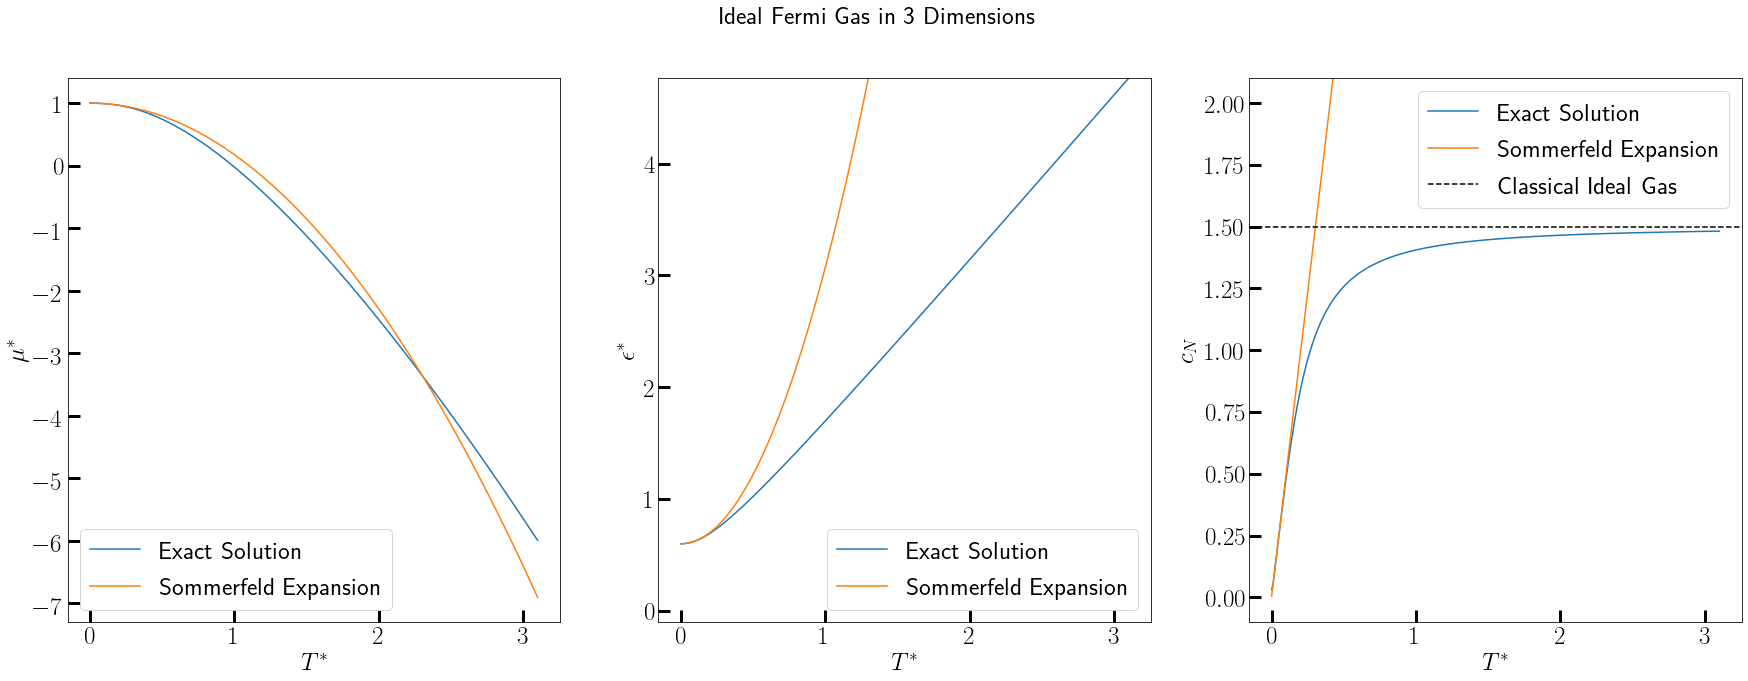

In [67]:
import numpy as np
from scipy.special import expit
from scipy.integrate import quad
from scipy.optimize import newton
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Bitstream Vera Sans']})
rc('text', usetex=True)
fs = 25

#You can adjust this 
temps = np.linspace(1e-3, 3.1, 300)

def ChemPotFunc(mu, T):
    I, ierr = quad(lambda x: (x)**(0.5)* expit(-(x-mu)/T),
                   0., np.inf,epsabs=1e-300,epsrel=1e-8,limit=100)
    return 1.0 - 1.5 * I

def ChemPotFunc_deriv(mu, T):
    I, ierr = quad(lambda x: (x)**(0.5) * expit(-(x-mu)/T) * (1 - expit(-(x-mu)/T)),
            0., np.inf,epsabs=1e-300,epsrel=1e-8,limit=100)
    return (-1.5/T) * I

def ChemPot(T, mu0):
    return newton(ChemPotFunc, mu0, fprime=ChemPotFunc_deriv, args=(T, ))

def Energy(mu, T):
    I, ierr = quad(lambda x: (x)**(1.5)* expit(-(x-mu)/T),
                   0., np.inf,epsabs=1e-300,epsrel=1e-8,limit=100)
    return 1.5 * I

mu0 = 1.0
mus = []
energies = []
for t in temps:
    mu0 = ChemPot(t, mu0)
    mus.append(mu0)
    energies.append(Energy(mu0, t))

cn = np.gradient(energies, temps)

fig, axs = plt.subplots(1, 3,figsize=(30, 10))
fig.suptitle('Ideal Fermi Gas in 3 Dimensions', fontsize=fs)

for ax in axs:
    ax.tick_params(direction='in', length=12, width=3, labelsize=fs)
    ax.set_xlabel(r"$T^\ast$", fontsize=fs)
    #ax.axvline(x=1.0, color='gray')

axs[0].plot(temps, mus, label="Exact Solution")
axs[0].plot(temps, 1. - ((np.pi**2/12.)* temps**2), label="Sommerfeld Expansion")
axs[0].set_ylabel(r"$\mu^\ast$", fontsize=fs)
axs[0].legend(fontsize=fs)

axs[1].plot(temps, energies, label="Exact Solution")
axs[1].plot(temps, (3./5.) + ((np.pi**2/4.)* temps**2), label="Sommerfeld Expansion")
axs[1].set_ylabel(r"$\epsilon^\ast$", fontsize=fs)
axs[1].set_ylim((-0.1, np.amax(energies)))
axs[1].legend(fontsize=fs)

axs[2].plot(temps, cn, label="Exact Solution")
axs[2].plot(temps, (np.pi**2/2.)* temps, label="Sommerfeld Expansion")
axs[2].set_ylabel(r"$c_N$", fontsize=fs)
axs[2].set_ylim((-0.1, 2.1))
axs[2].axhline(y=1.5, color='black', label=r'Classical Ideal Gas', linestyle='--')
axs[2].legend(fontsize=fs)

plt.show()

## Exercises:

### Problems
* Run the code above by loading it into [Jupyter](https://jupyter.org/), clicking on the code cell and pressing 'Shift-Enter'. Adjust the temperature range with the 'temps' variable and make plots for smaller and larger temperature ranges. Finally, make a table of $\mu^\ast$, $\epsilon^\ast$ and $c^\ast_N$ at the fermi temperature and compare with the values obtained from the Sommerfeld expansion. Repeat this for one-tenth of the Fermi temperature.

* Make suitable changes to the code and generalize it to lower dimensions, such as $d=1$ or $2$. Calculate the Sommerfeld expansions for all quantities in lower dimensions and compare with the numerical results in graphs similar to those obtained above.

### References:

1. In order to run this notebook in your computer, perform the following steps.
    * Download it by cloning this repository (see [Git Basics](https://git-scm.com/book/en/v2/Git-Basics-Getting-a-Git-Repository)  for this).
    * Download and install the anaconda python distribution (anaconda @ https://www.anaconda.com/). Also, see [this blog entry](https://fangohr.github.io/blog/installation-of-python-spyder-numpy-sympy-scipy-pytest-matplotlib-via-anaconda.html) on how to install anaconda.
    * Run this notebook on anaconda.

2. For a quick introduction to the Python programming language, as well as Numerical Python, Scientific Python and Matplotlib, see [this tutorial](https://cs231n.github.io/python-numpy-tutorial/)

3. In case you cannot install python locally on your computer, you may run this notebook online through [Binder](https://mybinder.org) by clicking on the "launch binder" badge at the top of this notebook.